In [173]:
import numpy as np
import pandas as pd
import time
import json

#read twitter archive file into pandas dataframe
twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [174]:
#download image predictions file using request library
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [175]:
#read the image_predictions.tsv file into a pandas dataframe
image_pred = pd.read_csv('image_predictions.tsv',sep='\t')

In [176]:
#query the Twitter API for each tweet's JSON data using Python's Tweepy library 
#and store each tweet's entire set of JSON data in a file called tweet_json.txt file.
import tweepy

#declare access tokens and keys
consumer_key = '****'
consumer_secret = '****'
access_token = '****'
access_secret = '****'



In [177]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [178]:
from timeit import default_timer as timer

In [179]:
tweet_ids =twitter_arc.tweet_id.values
len(tweet_ids)

2356

In [180]:
#query twitter API for json data
#initialize a counter to help track progress
count = 0
#create a dictionary to store tweet ids that cannot be retrieved
fails_dict = {}
#start tracking the time taken to run next lines of code
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + "ID - " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: ID - 892420643555336193
Success
2: ID - 892177421306343426
Success
3: ID - 891815181378084864
Success
4: ID - 891689557279858688
Success
5: ID - 891327558926688256
Success
6: ID - 891087950875897856
Success
7: ID - 890971913173991426
Success
8: ID - 890729181411237888
Success
9: ID - 890609185150312448
Success
10: ID - 890240255349198849
Success
11: ID - 890006608113172480
Success
12: ID - 889880896479866881
Success
13: ID - 889665388333682689
Success
14: ID - 889638837579907072
Success
15: ID - 889531135344209921
Success
16: ID - 889278841981685760
Success
17: ID - 888917238123831296
Success
18: ID - 888804989199671297
Success
19: ID - 888554962724278272
Success
20: ID - 888202515573088257
Fail
21: ID - 888078434458587136
Success
22: ID - 887705289381826560
Success
23: ID - 887517139158093824
Success
24: ID - 887473957103951883
Success
25: ID - 887343217045368832
Success
26: ID - 887101392804085760
Success
27: ID - 886983233522544640
Success
28: ID - 886736880519319552
Success
29: 

Success
227: ID - 848690551926992896
Success
228: ID - 848324959059550208
Success
229: ID - 848213670039564288
Success
230: ID - 848212111729840128
Success
231: ID - 847978865427394560
Success
232: ID - 847971574464610304
Success
233: ID - 847962785489326080
Success
234: ID - 847842811428974592
Success
235: ID - 847617282490613760
Success
236: ID - 847606175596138505
Success
237: ID - 847251039262605312
Success
238: ID - 847157206088847362
Success
239: ID - 847116187444137987
Success
240: ID - 846874817362120707
Success
241: ID - 846514051647705089
Success
242: ID - 846505985330044928
Success
243: ID - 846153765933735936
Success
244: ID - 846139713627017216
Success
245: ID - 846042936437604353
Success
246: ID - 845812042753855489
Success
247: ID - 845677943972139009
Success
248: ID - 845459076796616705
Fail
249: ID - 845397057150107648
Success
250: ID - 845306882940190720
Success
251: ID - 845098359547420673
Success
252: ID - 844979544864018432
Success
253: ID - 844973813909606400
Succ

Success
449: ID - 819006400881917954
Success
450: ID - 819004803107983360
Success
451: ID - 818646164899774465
Success
452: ID - 818627210458333184
Success
453: ID - 818614493328580609
Success
454: ID - 818588835076603904
Success
455: ID - 818536468981415936
Success
456: ID - 818307523543449600
Success
457: ID - 818259473185828864
Success
458: ID - 818145370475810820
Success
459: ID - 817908911860748288
Success
460: ID - 817827839487737858
Success
461: ID - 817777686764523521
Success
462: ID - 817536400337801217
Success
463: ID - 817502432452313088
Success
464: ID - 817423860136083457
Success
465: ID - 817415592588222464
Success
466: ID - 817181837579653120
Success
467: ID - 817171292965273600
Success
468: ID - 817120970343411712
Success
469: ID - 817056546584727552
Success
470: ID - 816829038950027264
Success
471: ID - 816816676327063552
Success
472: ID - 816697700272001025
Success
473: ID - 816450570814898180
Success
474: ID - 816336735214911488
Success
475: ID - 816091915477250048
S

Success
671: ID - 789986466051088384
Success
672: ID - 789960241177853952
Success
673: ID - 789903600034189313
Success
674: ID - 789628658055020548
Success
675: ID - 789599242079838210
Success
676: ID - 789530877013393408
Success
677: ID - 789314372632018944
Success
678: ID - 789280767834746880
Success
679: ID - 789268448748703744
Success
680: ID - 789137962068021249
Success
681: ID - 788908386943430656
Success
682: ID - 788765914992902144
Success
683: ID - 788552643979468800
Success
684: ID - 788412144018661376
Success
685: ID - 788178268662984705
Success
686: ID - 788150585577050112
Success
687: ID - 788070120937619456
Success
688: ID - 788039637453406209
Success
689: ID - 787810552592695296
Success
690: ID - 787717603741622272
Success
691: ID - 787397959788929025
Success
692: ID - 787322443945877504
Success
693: ID - 787111942498508800
Success
694: ID - 786963064373534720
Success
695: ID - 786729988674449408
Success
696: ID - 786709082849828864
Success
697: ID - 786664955043049472
S

Success
893: ID - 759447681597108224
Success
894: ID - 759446261539934208
Success
895: ID - 759197388317847553
Success
896: ID - 759159934323924993
Success
897: ID - 759099523532779520
Success
898: ID - 759047813560868866
Success
899: ID - 758854675097526272
Success
900: ID - 758828659922702336
Success
901: ID - 758740312047005698
Success
902: ID - 758474966123810816
Success
903: ID - 758467244762497024
Success
904: ID - 758405701903519748
Success
905: ID - 758355060040593408
Success
906: ID - 758099635764359168
Success
907: ID - 758041019896193024
Success
908: ID - 757741869644341248
Success
909: ID - 757729163776290825
Success
910: ID - 757725642876129280
Success
911: ID - 757611664640446465
Success
912: ID - 757597904299253760
Success
913: ID - 757596066325864448
Success
914: ID - 757400162377592832
Success
915: ID - 757393109802180609
Success
916: ID - 757354760399941633
Success
917: ID - 756998049151549440
Success
918: ID - 756939218950160384
Success
919: ID - 756651752796094464
S

Success
1112: ID - 733482008106668032
Success
1113: ID - 733460102733135873
Success
1114: ID - 733109485275860992
Success
1115: ID - 732732193018155009
Success
1116: ID - 732726085725589504
Success
1117: ID - 732585889486888962
Success
1118: ID - 732375214819057664
Success
1119: ID - 732005617171337216
Success
1120: ID - 731285275100512256
Success
1121: ID - 731156023742988288
Success
1122: ID - 730924654643314689
Success
1123: ID - 730573383004487680
Success
1124: ID - 730427201120833536
Success
1125: ID - 730211855403241472
Success
1126: ID - 730196704625098752
Success
1127: ID - 729854734790754305
Success
1128: ID - 729838605770891264
Success
1129: ID - 729823566028484608
Success
1130: ID - 729463711119904772
Success
1131: ID - 729113531270991872
Success
1132: ID - 728986383096946689
Success
1133: ID - 728760639972315136
Success
1134: ID - 728751179681943552
Success
1135: ID - 728653952833728512
Success
1136: ID - 728409960103686147
Success
1137: ID - 728387165835677696
Success
1138

Success
1328: ID - 705975130514706432
Success
1329: ID - 705970349788291072
Success
1330: ID - 705898680587526145
Success
1331: ID - 705786532653883392
Success
1332: ID - 705591895322394625
Success
1333: ID - 705475953783398401
Success
1334: ID - 705442520700944385
Success
1335: ID - 705428427625635840
Success
1336: ID - 705239209544720384
Success
1337: ID - 705223444686888960
Success
1338: ID - 705102439679201280
Success
1339: ID - 705066031337840642
Success
1340: ID - 704871453724954624
Success
1341: ID - 704859558691414016
Success
1342: ID - 704847917308362754
Success
1343: ID - 704819833553219584
Success
1344: ID - 704761120771465216
Success
1345: ID - 704499785726889984
Success
1346: ID - 704491224099647488
Success
1347: ID - 704480331685040129
Success
1348: ID - 704364645503647744
Success
1349: ID - 704347321748819968
Success
1350: ID - 704134088924532736
Success
1351: ID - 704113298707505153
Success
1352: ID - 704054845121142784
Success
1353: ID - 703774238772166656
Success
1354

Success
1544: ID - 689557536375177216
Success
1545: ID - 689517482558820352
Success
1546: ID - 689289219123089408
Success
1547: ID - 689283819090870273
Success
1548: ID - 689280876073582592
Success
1549: ID - 689275259254616065
Success
1550: ID - 689255633275777024
Success
1551: ID - 689154315265683456
Success
1552: ID - 689143371370250240
Success
1553: ID - 688916208532455424
Success
1554: ID - 688908934925697024
Success
1555: ID - 688898160958271489
Success
1556: ID - 688894073864884227
Success
1557: ID - 688828561667567616
Success
1558: ID - 688804835492233216
Success
1559: ID - 688789766343622656
Success
1560: ID - 688547210804498433
Success
1561: ID - 688519176466644993
Success
1562: ID - 688385280030670848
Success
1563: ID - 688211956440801280
Success
1564: ID - 688179443353796608
Success
1565: ID - 688116655151435777
Success
1566: ID - 688064179421470721
Success
1567: ID - 687841446767013888
Success
1568: ID - 687826841265172480
Success
1569: ID - 687818504314159109
Success
1570

Success
1760: ID - 678740035362037760
Success
1761: ID - 678708137298427904
Success
1762: ID - 678675843183484930
Success
1763: ID - 678643457146150913
Success
1764: ID - 678446151570427904
Success
1765: ID - 678424312106393600
Success
1766: ID - 678410210315247616
Success
1767: ID - 678399652199309312
Success
1768: ID - 678396796259975168
Success
1769: ID - 678389028614488064
Success
1770: ID - 678380236862578688
Success
1771: ID - 678341075375947776
Success
1772: ID - 678334497360859136
Success
1773: ID - 678278586130948096
Success
1774: ID - 678255464182861824
Success
1775: ID - 678023323247357953
Success
1776: ID - 678021115718029313
Success
1777: ID - 677961670166224897
Success
1778: ID - 677918531514703872
Success
1779: ID - 677895101218201600
Success
1780: ID - 677716515794329600
Success
1781: ID - 677700003327029250
Success
1782: ID - 677698403548192770
Success
1783: ID - 677687604918272002
Success
1784: ID - 677673981332312066
Success
1785: ID - 677662372920729601
Success
1786

Success
1976: ID - 672997845381865473
Success
1977: ID - 672995267319328768
Success
1978: ID - 672988786805112832
Success
1979: ID - 672984142909456390
Success
1980: ID - 672980819271634944
Success
1981: ID - 672975131468300288
Success
1982: ID - 672970152493887488
Success
1983: ID - 672968025906282496
Success
1984: ID - 672964561327235073
Success
1985: ID - 672902681409806336
Success
1986: ID - 672898206762672129
Success
1987: ID - 672884426393653248
Success
1988: ID - 672877615439593473
Success
1989: ID - 672834301050937345
Success
1990: ID - 672828477930868736
Success
1991: ID - 672640509974827008
Success
1992: ID - 672622327801233409
Success
1993: ID - 672614745925664768
Success
1994: ID - 672609152938721280
Success
1995: ID - 672604026190569472
Success
1996: ID - 672594978741354496
Success
1997: ID - 672591762242805761
Success
1998: ID - 672591271085670400
Success
1999: ID - 672538107540070400
Success
2000: ID - 672523490734551040
Success
2001: ID - 672488522314567680
Success
2002

Success
2192: ID - 668955713004314625
Success
2193: ID - 668932921458302977
Success
2194: ID - 668902994700836864
Success
2195: ID - 668892474547511297
Success
2196: ID - 668872652652679168
Success
2197: ID - 668852170888998912
Success
2198: ID - 668826086256599040
Success
2199: ID - 668815180734689280
Success
2200: ID - 668779399630725120
Success
2201: ID - 668655139528511488
Success
2202: ID - 668645506898350081
Success
2203: ID - 668643542311546881
Success
2204: ID - 668641109086707712
Success
2205: ID - 668636665813057536
Success
2206: ID - 668633411083464705
Success
2207: ID - 668631377374486528
Success
2208: ID - 668627278264475648
Success
2209: ID - 668625577880875008
Success
2210: ID - 668623201287675904
Success
2211: ID - 668620235289837568
Success
2212: ID - 668614819948453888
Success
2213: ID - 668587383441514497
Success
2214: ID - 668567822092664832
Success
2215: ID - 668544745690562560
Success
2216: ID - 668542336805281792
Success
2217: ID - 668537837512433665
Success
2218

In [188]:
# Empty list to convert to DataFrame
df_list = []

# Open text file for reading
with open ('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string status into a dictionary and reading each line as a dictionary
        each_tweet_line = json.loads(line)
         # Getting the required parameters
        tweet_id = each_tweet_line['id']
        retweet_count = each_tweet_line['retweet_count']
        favorite_count = each_tweet_line['favorite_count']
        
        df_list.append({'id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})
#create  a dataframe with tweet id, retweet count and favorite count        
json_api = pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count'])

In [189]:
json_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,7009,33791
1,892177421306343426,5301,29318
2,891815181378084864,3481,22042
3,891689557279858688,7217,36903
4,891327558926688256,7760,35277


In [191]:
json_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


# Assess Data

In [192]:
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [193]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [194]:
twitter_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [195]:
twitter_arc[twitter_arc.expanded_urls.isnull()].shape

(59, 17)

In [196]:
twitter_arc[twitter_arc.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [197]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
958,705475953783398401,https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg,1,golden_retriever,0.908784,True,Labrador_retriever,0.030361,True,tennis_ball,0.004996,False
1391,766793450729734144,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,1,beagle,0.451697,True,basset,0.197513,True,bloodhound,0.072699,True
435,674394782723014656,https://pbs.twimg.com/media/CVvueeeWwAUcQLR.jpg,1,toilet_tissue,0.134983,False,mosquito_net,0.133247,False,Lakeland_terrier,0.109099,True
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
159,668892474547511297,https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg,1,kelpie,0.421979,True,collie,0.227060,True,Cardigan,0.168211,True
1907,852553447878664193,https://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg,1,bloodhound,0.186498,True,Brabancon_griffon,0.139028,True,Rottweiler,0.125940,True
646,681654059175129088,https://pbs.twimg.com/media/CXW4wGHWsAE_eBD.jpg,1,Pomeranian,0.800538,True,chow,0.146892,True,Pekinese,0.037613,True
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True


In [198]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [199]:
json_api.sample(5)

,id,retweet_count,favorite_count
1160,718454725339934721,1384,4515
544,802572683846291456,2358,8520
1559,686749460672679938,1321,3207
1223,710997087345876993,1267,4222
165,858843525470990336,3027,14119


In [200]:
json_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [201]:
twitter_arc.loc[(twitter_arc['name'].str.islower())].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None


In [202]:
twitter_arc.loc[(twitter_arc['name'].str.islower())].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
getting          2
actually         2
not              2
mad              2
all              1
life             1
my               1
such             1
his              1
incredibly       1
light            1
this             1
space            1
old              1
unacceptable     1
infuriating      1
officially       1
by               1
Name: name, dtype: int64

In [203]:
twitter_arc.query('name == "an"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [204]:
twitter_arc.query('rating_numerator > 14')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


### Quality issues

- Dataset contains retweets in columns like retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp values which are redundant
- Erroneous datatypes in twitter_arc table (timestamp,tweet_id,in_reply_to_status_id,in_reply_to_user_id)
- Incorrect dog names starting with lowercase characters given names of 'a', 'an' etc
- Columns have alot of missing values (in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)
- Wrong datatype in tweet_id column in image_prediction dataframe
- Expanded_urls column have rows with missing values.
- ID column in json_api table not matching tweet_id column in other tables
- rating numerators have large numbers like 420 and 666



### Tidiness issues

- Doggo, floofer, pupper and puppo columns in twitter_arc to be merged into one column named stage.
- Tables to be joined at the end

## Clean Data

In [300]:
#create copies of original dataframes
twitter_arc_clean_df = twitter_arc.copy()
image_pred_clean_df = image_pred.copy()
json_api_clean_df = json_api.copy()

In [301]:
twitter_arc_clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [302]:
image_pred_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [303]:
json_api_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Clean completeness issues

#### Define 

Clean missing values by droping the redundant columns which we wont use in our analysis.
The columns are in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp which contain mostly missing values.


#### Code


In [304]:
#list to be dropped
list = [ 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
#drop the list columns
twitter_arc_clean_df.drop(list,axis=1, inplace=True)

#### Test


In [305]:
#check our dataframe
twitter_arc_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Tidiness

#### Define

Doggo, floofer, pupper and puppo columns in twitter_arc to be merged into one column named stage

Drop the columns of doggo, floofer, pupper and puppo and create a column name stage in the twitter_arc dataframe

#### Code

In [306]:
#replace none in individual dog columns
twitter_arc_clean_df.doggo.replace('None', '', inplace=True)
twitter_arc_clean_df.floofer.replace('None', '', inplace=True)
twitter_arc_clean_df.pupper.replace('None', '', inplace=True)
twitter_arc_clean_df.puppo.replace('None', '', inplace=True)

In [307]:
#merge all the individual dog columns
twitter_arc_clean_df['stage'] = twitter_arc_clean_df.doggo + twitter_arc_clean_df.floofer + twitter_arc_clean_df.pupper + twitter_arc_clean_df.puppo

#format the entries with 2 stages as doggopuppo
twitter_arc_clean_df.loc[twitter_arc_clean_df.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_arc_clean_df.loc[twitter_arc_clean_df.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_arc_clean_df.loc[twitter_arc_clean_df.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [308]:
twitter_arc_clean_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,,,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,doggo


In [309]:
#drop the extracted columns
list = ['puppo', 'pupper', 'floofer', 'doggo']
twitter_arc_clean_df.drop(list, axis=1, inplace=True)

In [310]:
twitter_arc_clean_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [311]:
#replace empty spaces with NaNs
twitter_arc_clean_df.stage = twitter_arc_clean_df.stage.replace('', np.NaN)

In [312]:
twitter_arc_clean_df.stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

#### Test

In [313]:
twitter_arc_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   stage               380 non-null    object
dtypes: int64(3), object(6)
memory usage: 165.8+ KB


In [314]:
twitter_arc_clean_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1288,708349470027751425,2016-03-11 17:50:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is River. He's changing the trumpet game....,https://twitter.com/dog_rates/status/708349470...,11,10,River,NaN
945,752660715232722944,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,https://twitter.com/dog_rates/status/752660715...,10,10,None,doggo
1914,674330906434379776,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,13,10,None,NaN
2294,667138269671505920,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,https://twitter.com/dog_rates/status/667138269...,10,10,None,NaN
2314,666701168228331520,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,https://twitter.com/dog_rates/status/666701168...,8,10,a,NaN
1567,687826841265172480,2016-01-15 02:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a rollercoaster of emotion...,https://twitter.com/dog_rates/status/687826841...,12,10,Louis,NaN
1604,685906723014619143,2016-01-09 19:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olive. He's stuck in a sleeve. 9/10 da...,https://twitter.com/dog_rates/status/685906723...,9,10,Olive,NaN
669,790227638568808452,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leela. She's a Fetty Wo...,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,NaN
1261,710153181850935296,2016-03-16 17:18:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lacy. She's tipping her hat to you. Da...,https://twitter.com/dog_rates/status/710153181...,11,10,Lacy,NaN
113,870726314365509632,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,None,NaN


### Quality

#### Define

Numerators with rating exceeding 14 converted to 14

#### Code

In [315]:
#equating numerators above 14 to 14
twitter_arc_clean_df.loc[twitter_arc_clean_df.rating_numerator > 14,['rating_numerator']] = 14

#### Test


In [316]:
#checking numerators above 14
twitter_arc_clean_df.query('rating_numerator > 14')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


#### Define

Drop rows which have null values in expnaded_urls

#### Code

In [317]:
#drop NA rows in expanded_urls with
twitter_arc_clean_df.dropna(subset = ['expanded_urls'], inplace = True)

#### Test

In [318]:
#checking the expanded_urls column
twitter_arc_clean_df.loc[twitter_arc_clean_df.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


In [319]:
twitter_arc_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   stage               374 non-null    object
dtypes: int64(3), object(6)
memory usage: 179.5+ KB


#### Define

Renaming column label 'id' in json_api table to 'tweet_id' 

#### Code

In [320]:
#rename id column to tweet_id
json_api_clean_df.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [321]:
#check json_api_clean_df columns
json_api_clean_df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### Define

Correcting erronious datatypes

Convert timestamp to a datetime and tweet_id column to string

#### Code

In [322]:
#convert tweet_id column from integer to string
twitter_arc_clean_df.tweet_id = twitter_arc_clean_df.tweet_id.astype(str)
image_pred_clean_df.tweet_id = image_pred_clean_df.tweet_id.astype(str)
json_api_clean_df.tweet_id = json_api_clean_df.tweet_id.astype(str)

#convert timestamp column from string to datetime
twitter_arc_clean_df.timestamp = pd.to_datetime(twitter_arc_clean_df.timestamp)

#### Test

In [323]:
twitter_arc_clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   object             
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                2297 non-null   object             
 8   stage               374 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 179.5+ KB


### Tidiness

#### Define
Join all the tables into one table

Merge all the dataframes on tweet_id column

#### Code

In [324]:
#check json_api_clean_df columns
json_api_clean_df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [325]:
#check twitter_arc_clean_df columns
twitter_arc_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

In [326]:
#check image_pred_clean_df column
image_pred_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [327]:
image_pred_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [328]:
json_api_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [329]:
#merge all the three datasets together
twitter_archive_master = pd.merge(twitter_arc_clean_df, image_pred_clean_df, on='tweet_id', how='inner').merge(json_api_clean_df, on='tweet_id', how='inner')


#### Test

In [356]:
#view the top 10 rows of the twitter archive master dataframe
twitter_archive_master.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7009,33791
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5301,29318
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3481,22042
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7217,36903
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7760,35277
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2599,17795
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1663,10351
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,15752,56812
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,3620,24513
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6098,27941


In [332]:
#check the combined twitter archive master dataframe 
twitter_arc_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [330]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2057 non-null   object             
 1   timestamp           2057 non-null   datetime64[ns, UTC]
 2   source              2057 non-null   object             
 3   text                2057 non-null   object             
 4   expanded_urls       2057 non-null   object             
 5   rating_numerator    2057 non-null   int64              
 6   rating_denominator  2057 non-null   int64              
 7   name                2057 non-null   object             
 8   stage               318 non-null    object             
 9   jpg_url             2057 non-null   object             
 10  img_num             2057 non-null   int64              
 11  p1                  2057 non-null   object             
 12  p1_conf             2057 non-null 

## Storing data

In [333]:
#save the data to a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

In [335]:
#check storage of master file
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [336]:
#check first 5 rows pf twitter_archive_master file
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7009,33791
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5301,29318
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3481,22042
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7217,36903
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7760,35277


In [337]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2057 non-null   int64  
 1   timestamp           2057 non-null   object 
 2   source              2057 non-null   object 
 3   text                2057 non-null   object 
 4   expanded_urls       2057 non-null   object 
 5   rating_numerator    2057 non-null   int64  
 6   rating_denominator  2057 non-null   int64  
 7   name                2057 non-null   object 
 8   stage               318 non-null    object 
 9   jpg_url             2057 non-null   object 
 10  img_num             2057 non-null   int64  
 11  p1                  2057 non-null   object 
 12  p1_conf             2057 non-null   float64
 13  p1_dog              2057 non-null   bool   
 14  p2                  2057 non-null   object 
 15  p2_conf             2057 non-null   float64
 16  p2_dog

### Analyzing and visualizing data

### Most loved dog stages

In [355]:
#most loved dog stage
twitter_archive_master.groupby(['stage']).favorite_count.sum().sort_values(ascending=False)

stage
pupper           1259079
doggo            1090715
puppo             430360
doggo,pupper      108286
floofer            78555
doggo,puppo        41897
doggo,floofer      14843
Name: favorite_count, dtype: int64

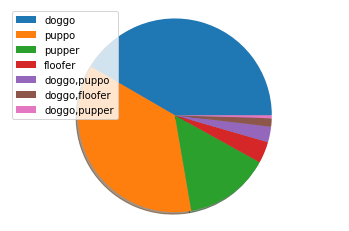

In [351]:
#visualizing dog stages to show most favorite dog stage
import matplotlib.pyplot as plt
labels = twitter_archive_master.stage.unique().tolist()[1:]
sizes = twitter_archive_master.groupby(['stage']).favorite_count.sum().sort_values(ascending=False).tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes,shadow=True)
plt.legend(labels)
ax1.axis('equal')

plt.show();

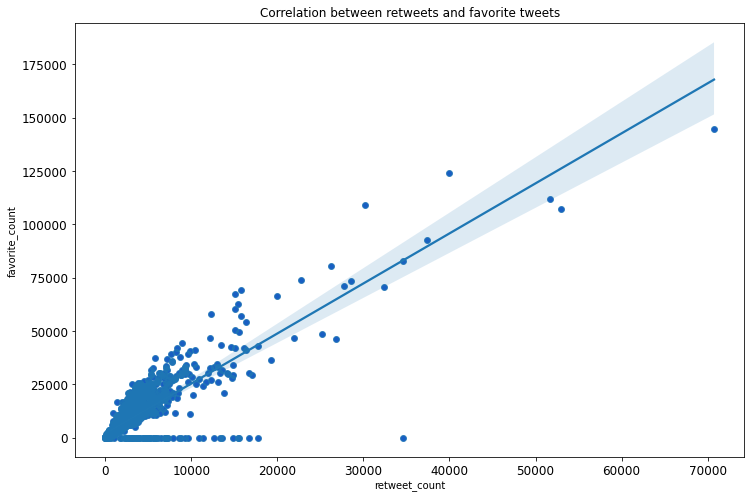

In [364]:
#regression plot
import seaborn as sns
twitter_archive_master.plot.scatter(x= 'retweet_count', y= 'favorite_count', color = 'blue', fontsize=12, figsize = (12,8),subplots = True);
plt.xlabel('number of retweeted tweets');
plt.ylabel('number of favorite tweets');
plt.title('Correlation between retweets and favorite tweets');

sns.regplot(x='retweet_count', y='favorite_count',data = twitter_archive_master);


In [353]:
#most retweeted dog stage
twitter_archive_master.groupby(['stage']).retweet_count.sum().sort_values(ascending=False)

stage
doggo            427327
pupper           418370
puppo            121566
doggo,pupper      49463
floofer           27905
doggo,puppo       16141
doggo,floofer      2795
Name: retweet_count, dtype: int64

### Most retweeted dog names

In [352]:
#most retweeted dog names
twitter_archive_master.groupby(['name']).retweet_count.sum().sort_values(ascending=False)

name
None          1428855
Bo              97653
Stephan         51682
Sunny           45920
a               45647
               ...   
Keet               45
Julio              43
Christoper         42
Kallie             35
Bloo               35
Name: retweet_count, Length: 934, dtype: int64

### Top rated dogs

In [357]:
#top rated dog stage
twitter_archive_master.query('rating_numerator == 14').stage.value_counts()

doggo     9
pupper    9
puppo     1
Name: stage, dtype: int64

### Insights

- Pupper is the most favorable dog stage, it has the highest number favorite count.
- Doggo is the most retweeted dog stage, followed by pupper and puppo.
- Doggo and Pupper are the highest rated dogs with rating of 14
- Bo and stephan are the most retweeted names
- There is a positive correlation between retweets and favorite tweets